In [42]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300
import warnings 
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree 
from sklearn.metrics import classification_report,accuracy_score
from sklearn import preprocessing

In [2]:
data = pd.read_csv('heart_disease.csv')
data.head()

age   sex               cp  trestbps  chol    fbs         restecg  thalch  \
0   63  Male   typical angina       145   233   True  lv hypertrophy     150   
1   41  Male  atypical angina       135   203  False          normal     132   
2   57  Male     asymptomatic       140   192  False          normal     148   
3   52  Male   typical angina       118   186  False  lv hypertrophy     190   
4   57  Male     asymptomatic       110   201  False          normal     126   

   exang  oldpeak        slope          thal  num  
0  FALSE      2.3  downsloping  fixed defect    0  
1  FALSE      0.0         flat  fixed defect    0  
2  FALSE      0.4         flat  fixed defect    0  
3  FALSE      0.0         flat  fixed defect    0  
4   TRUE      1.5         flat  fixed defect    0

#### Exploratory Data Analysis

In [3]:
data.describe()

age    trestbps        chol      thalch     oldpeak         num
count  908.000000  908.000000  908.000000  908.000000  846.000000  908.000000
mean    53.791850  133.430617  201.484581  135.957048    0.891253    1.008811
std      9.158031   20.401608  112.097949   26.804929    1.093875    1.144436
min     29.000000    0.000000    0.000000   60.000000   -2.600000    0.000000
25%     47.750000  120.000000  176.750000  118.000000    0.000000    0.000000
50%     54.000000  130.000000  224.000000  138.000000    0.500000    1.000000
75%     60.000000  144.000000  270.000000  156.000000    1.500000    2.000000
max     77.000000  200.000000  603.000000  202.000000    6.200000    4.000000

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [5]:
data.duplicated().sum()

0

In [6]:
data.isna().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [7]:
# there are 62 null values present in column oldpeak, so we will treat them 
data[data['oldpeak'].isna()]

age   sex               cp  trestbps  chol    fbs           restecg  \
9     53  Male      non-anginal       155   175   True  st-t abnormality   
371   55  Male  atypical angina       110   214   True  st-t abnormality   
380   69  Male      non-anginal       175   271  False    lv hypertrophy   
381   51  Male     asymptomatic       133   218   True    lv hypertrophy   
382   58  Male     asymptomatic       131   385   True    lv hypertrophy   
..   ...   ...              ...       ...   ...    ...               ...   
877   69  Male     asymptomatic       154   289   True  st-t abnormality   
878   64  Male     asymptomatic       134   306   True  st-t abnormality   
879   60  Male      non-anginal       186   316   True  st-t abnormality   
906   56  Male      non-anginal       144   208   True  st-t abnormality   
907   57  Male     asymptomatic       142   277   True  st-t abnormality   

     thalch  exang  oldpeak        slope               thal  num  
9       160  FALSE      NaN    upsloping       fixed defect    0  
371     180  FALSE      NaN         flat  reversable defect    0  
380      82  FALSE      NaN    upsloping             normal    0  
381     156   TURE      NaN    upsloping       fixed defect    0  
382     126   TURE      NaN         flat             normal    0  
..      ...    ...      ...          ...                ...  ...  
877     128   TURE      NaN         flat             normal    3  
878      73   TURE      NaN    upsloping       fixed defect    3  
879      70   TURE      NaN         flat             normal    3  
906     105   TURE      NaN  downsloping  reversable defect    4  
907     182  FALSE      NaN         flat             normal    4  

[62 rows x 13 columns]

<Axes: xlabel='oldpeak'>

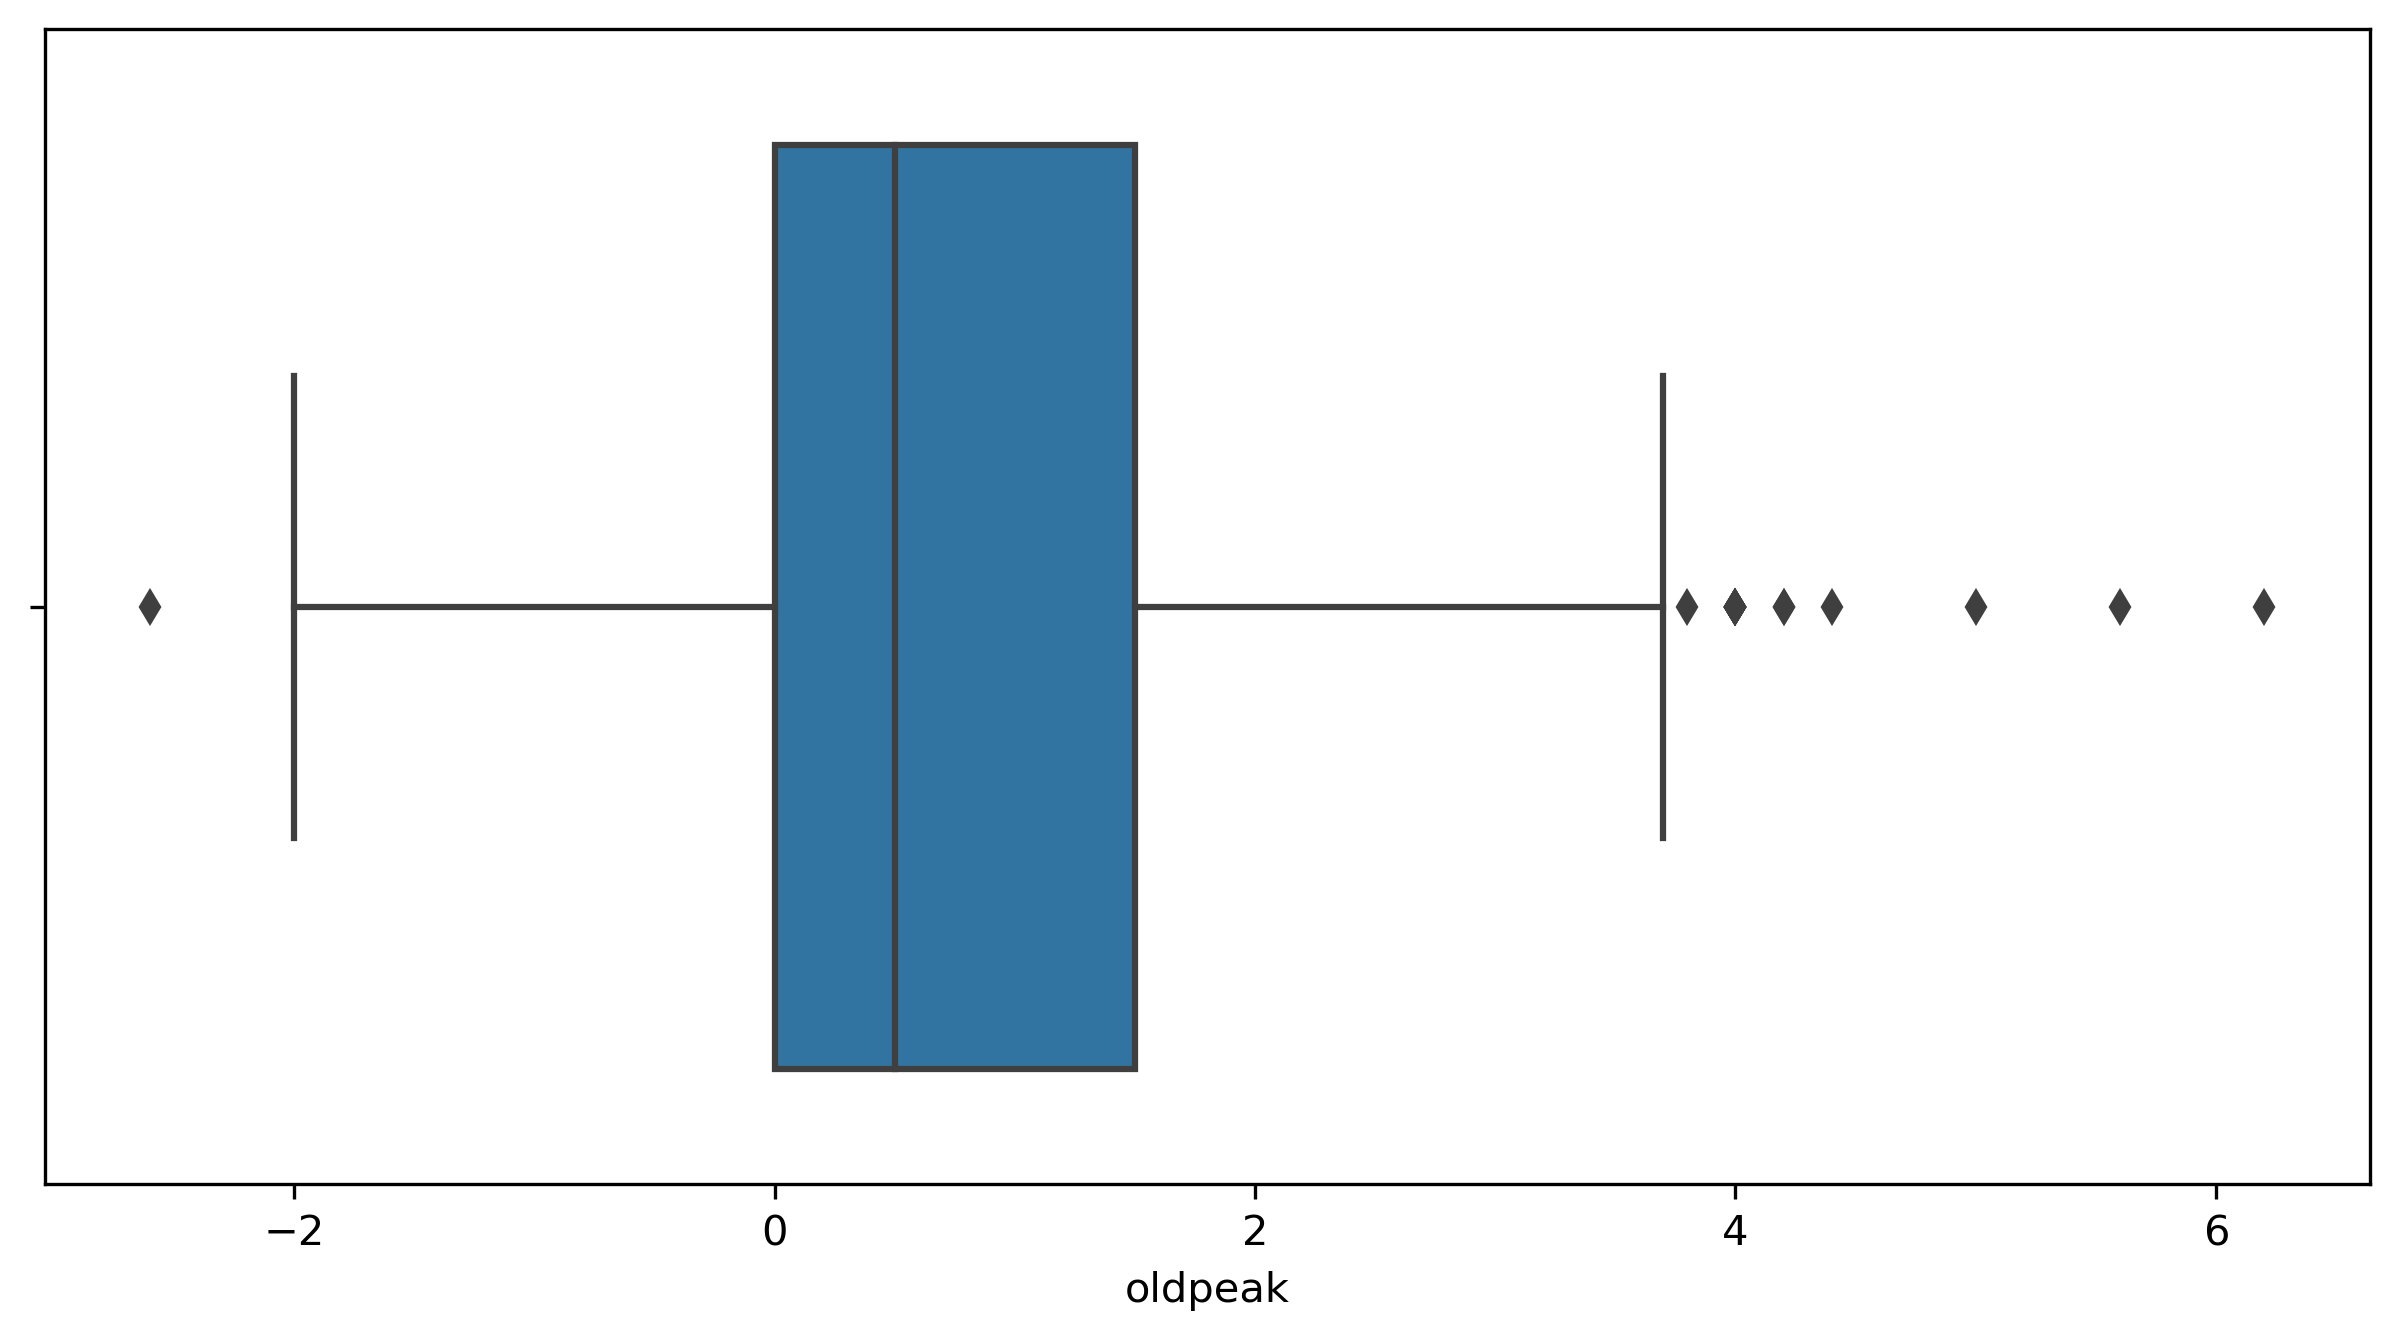

In [8]:
# as oldpeak is of float datatype, we will check if there are outliers present
# if present then replacing missing values with the median of the column 
# if not present them replacing missing values with the mean of the column 
import seaborn as sns 
sns.boxplot(x = data['oldpeak'])

In [9]:
# there are outliers present we will replace missing values with median of the column 
data['oldpeak'].fillna(data['oldpeak'].median(),inplace=True)

In [10]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

<Axes: >

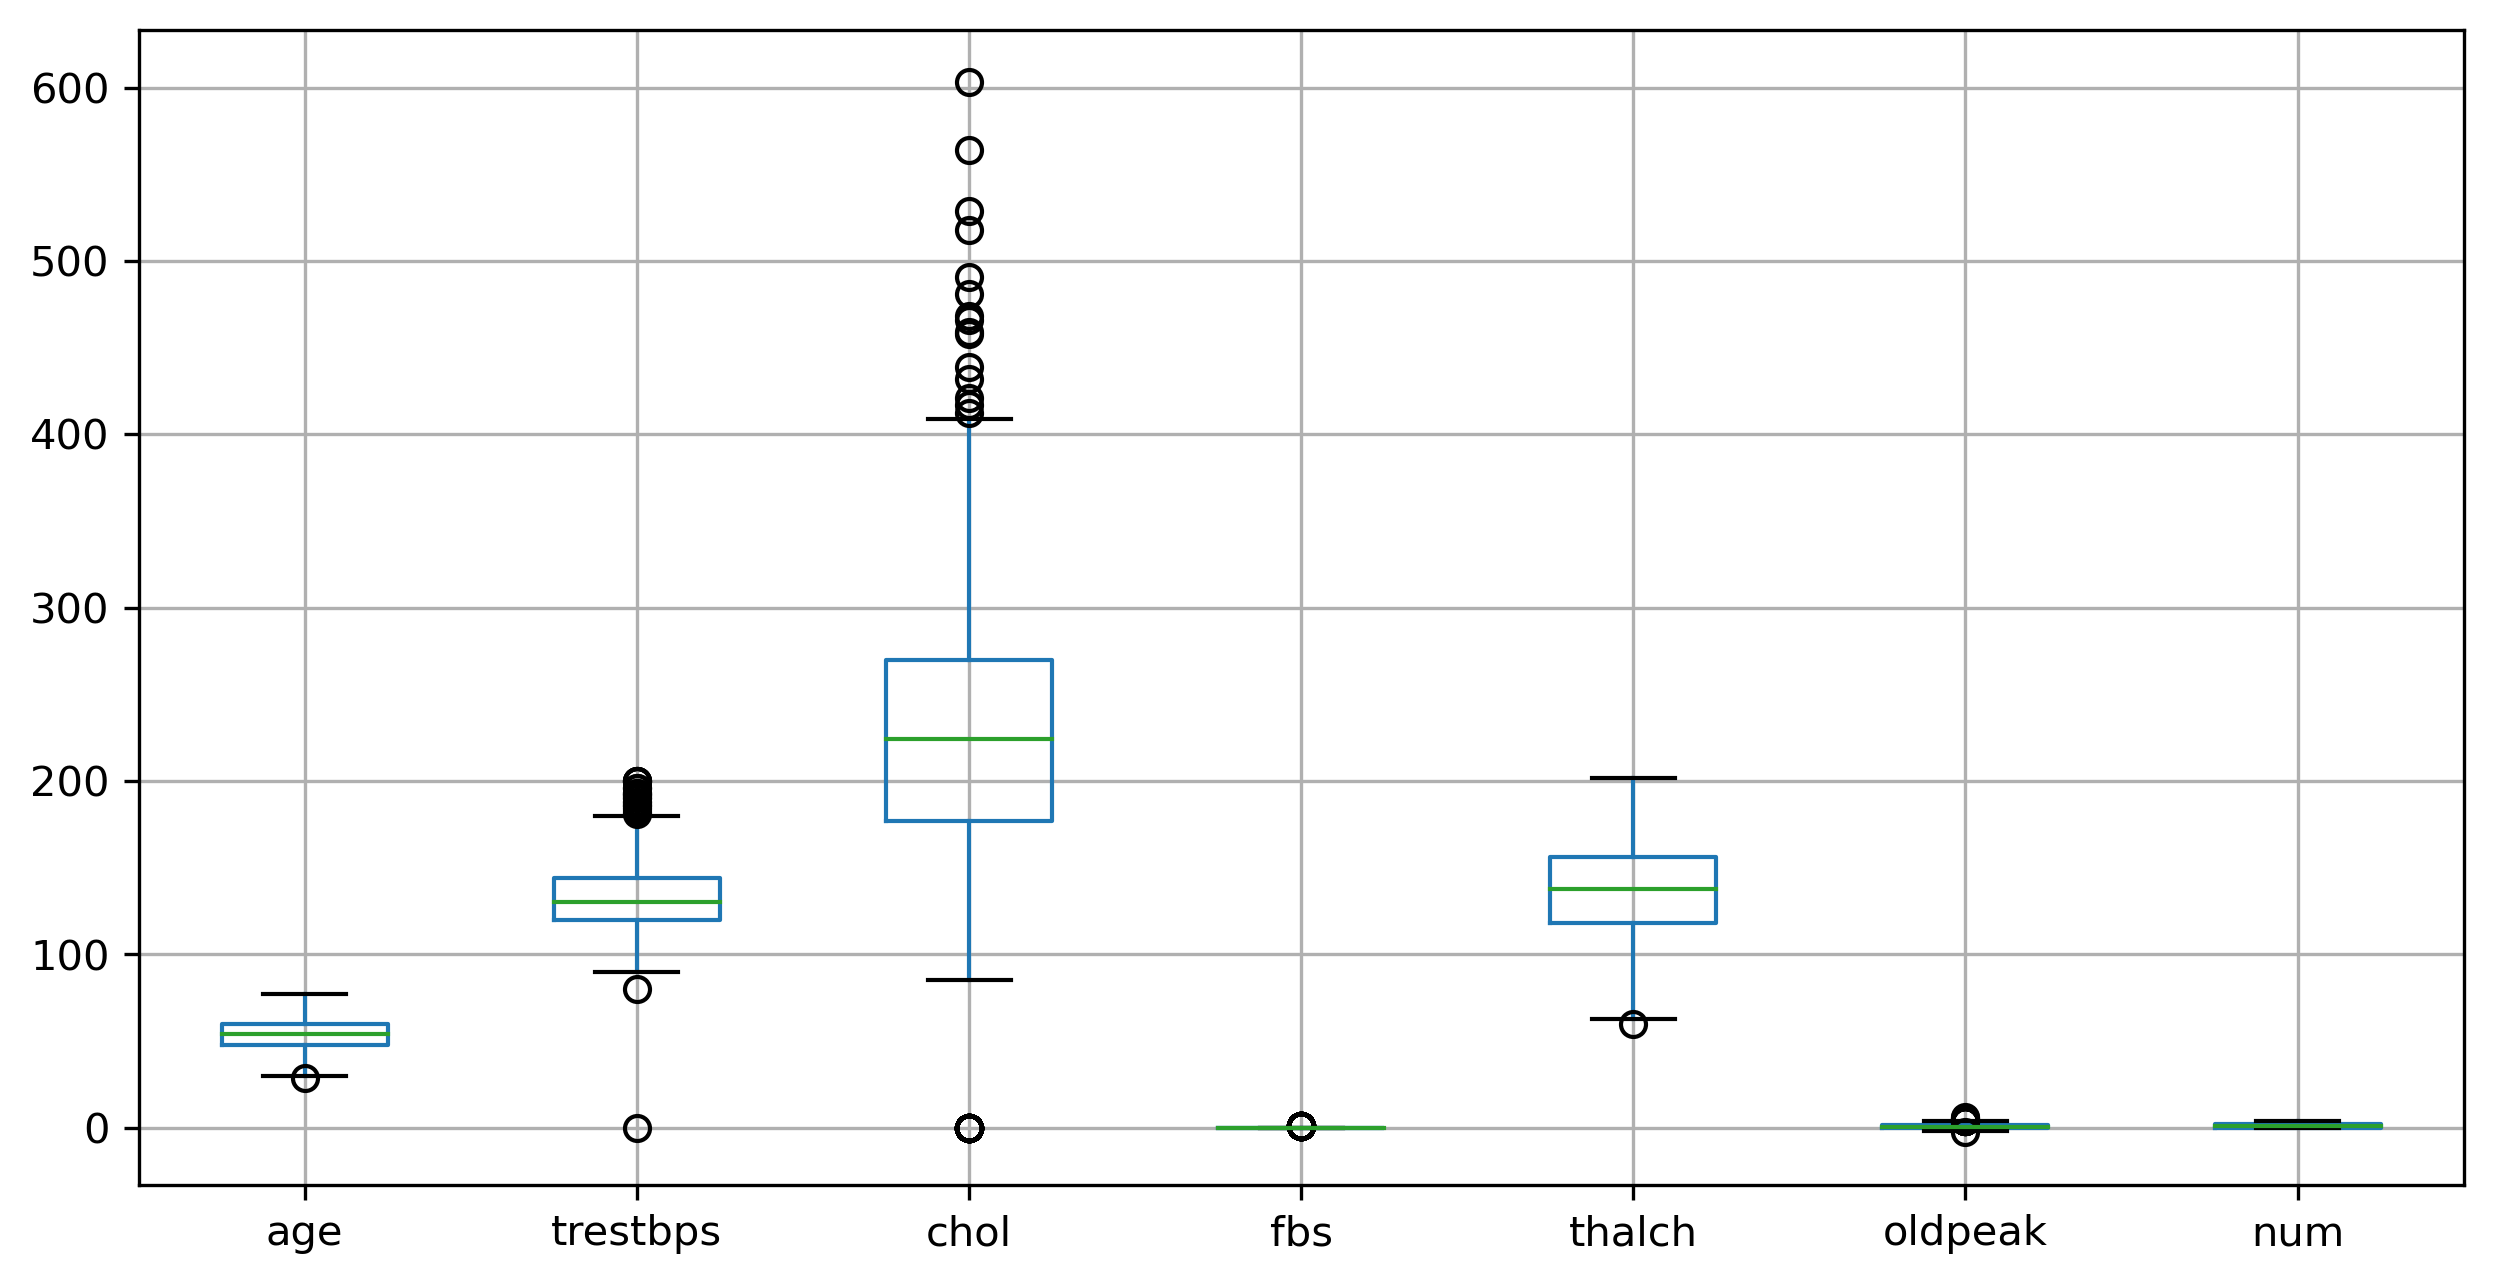

In [11]:
# now checking for outliers 
data.boxplot()

In [12]:
# in almost all columns there are outliers present, defining two funcitions 
def outlier_detection(data,colname):
    q1 = data[colname].quantile(0.25)
    q3 = data[colname].quantile(0.75)
    iqr= q3 - q1 
    
    upper_extreme = q3 + (1.5 * iqr)
    lower_extreme = q1 - (1.5 * iqr)
    
    return lower_extreme,upper_extreme

In [13]:
def outlier_treatment(data,colname):
    lower_extreme,upper_extreme = outlier_detection(data,colname)
    data.loc[data[colname]>upper_extreme,colname] = upper_extreme
    data.loc[data[colname]<lower_extreme,colname] = lower_extreme
    
    print(f"All the outliers of Column {colname} are treated !!!")

In [14]:
data.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs            bool
restecg      object
thalch        int64
exang        object
oldpeak     float64
slope        object
thal         object
num           int64
dtype: object

In [15]:
outlier_treatment(data,'age')
outlier_treatment(data,'trestbps')
outlier_treatment(data,'chol')
outlier_treatment(data,'thalch')
outlier_treatment(data,'oldpeak')
outlier_treatment(data,'num')

All the outliers of Column age are treated !!!
All the outliers of Column trestbps are treated !!!
All the outliers of Column chol are treated !!!
All the outliers of Column thalch are treated !!!
All the outliers of Column oldpeak are treated !!!
All the outliers of Column num are treated !!!


<Axes: >

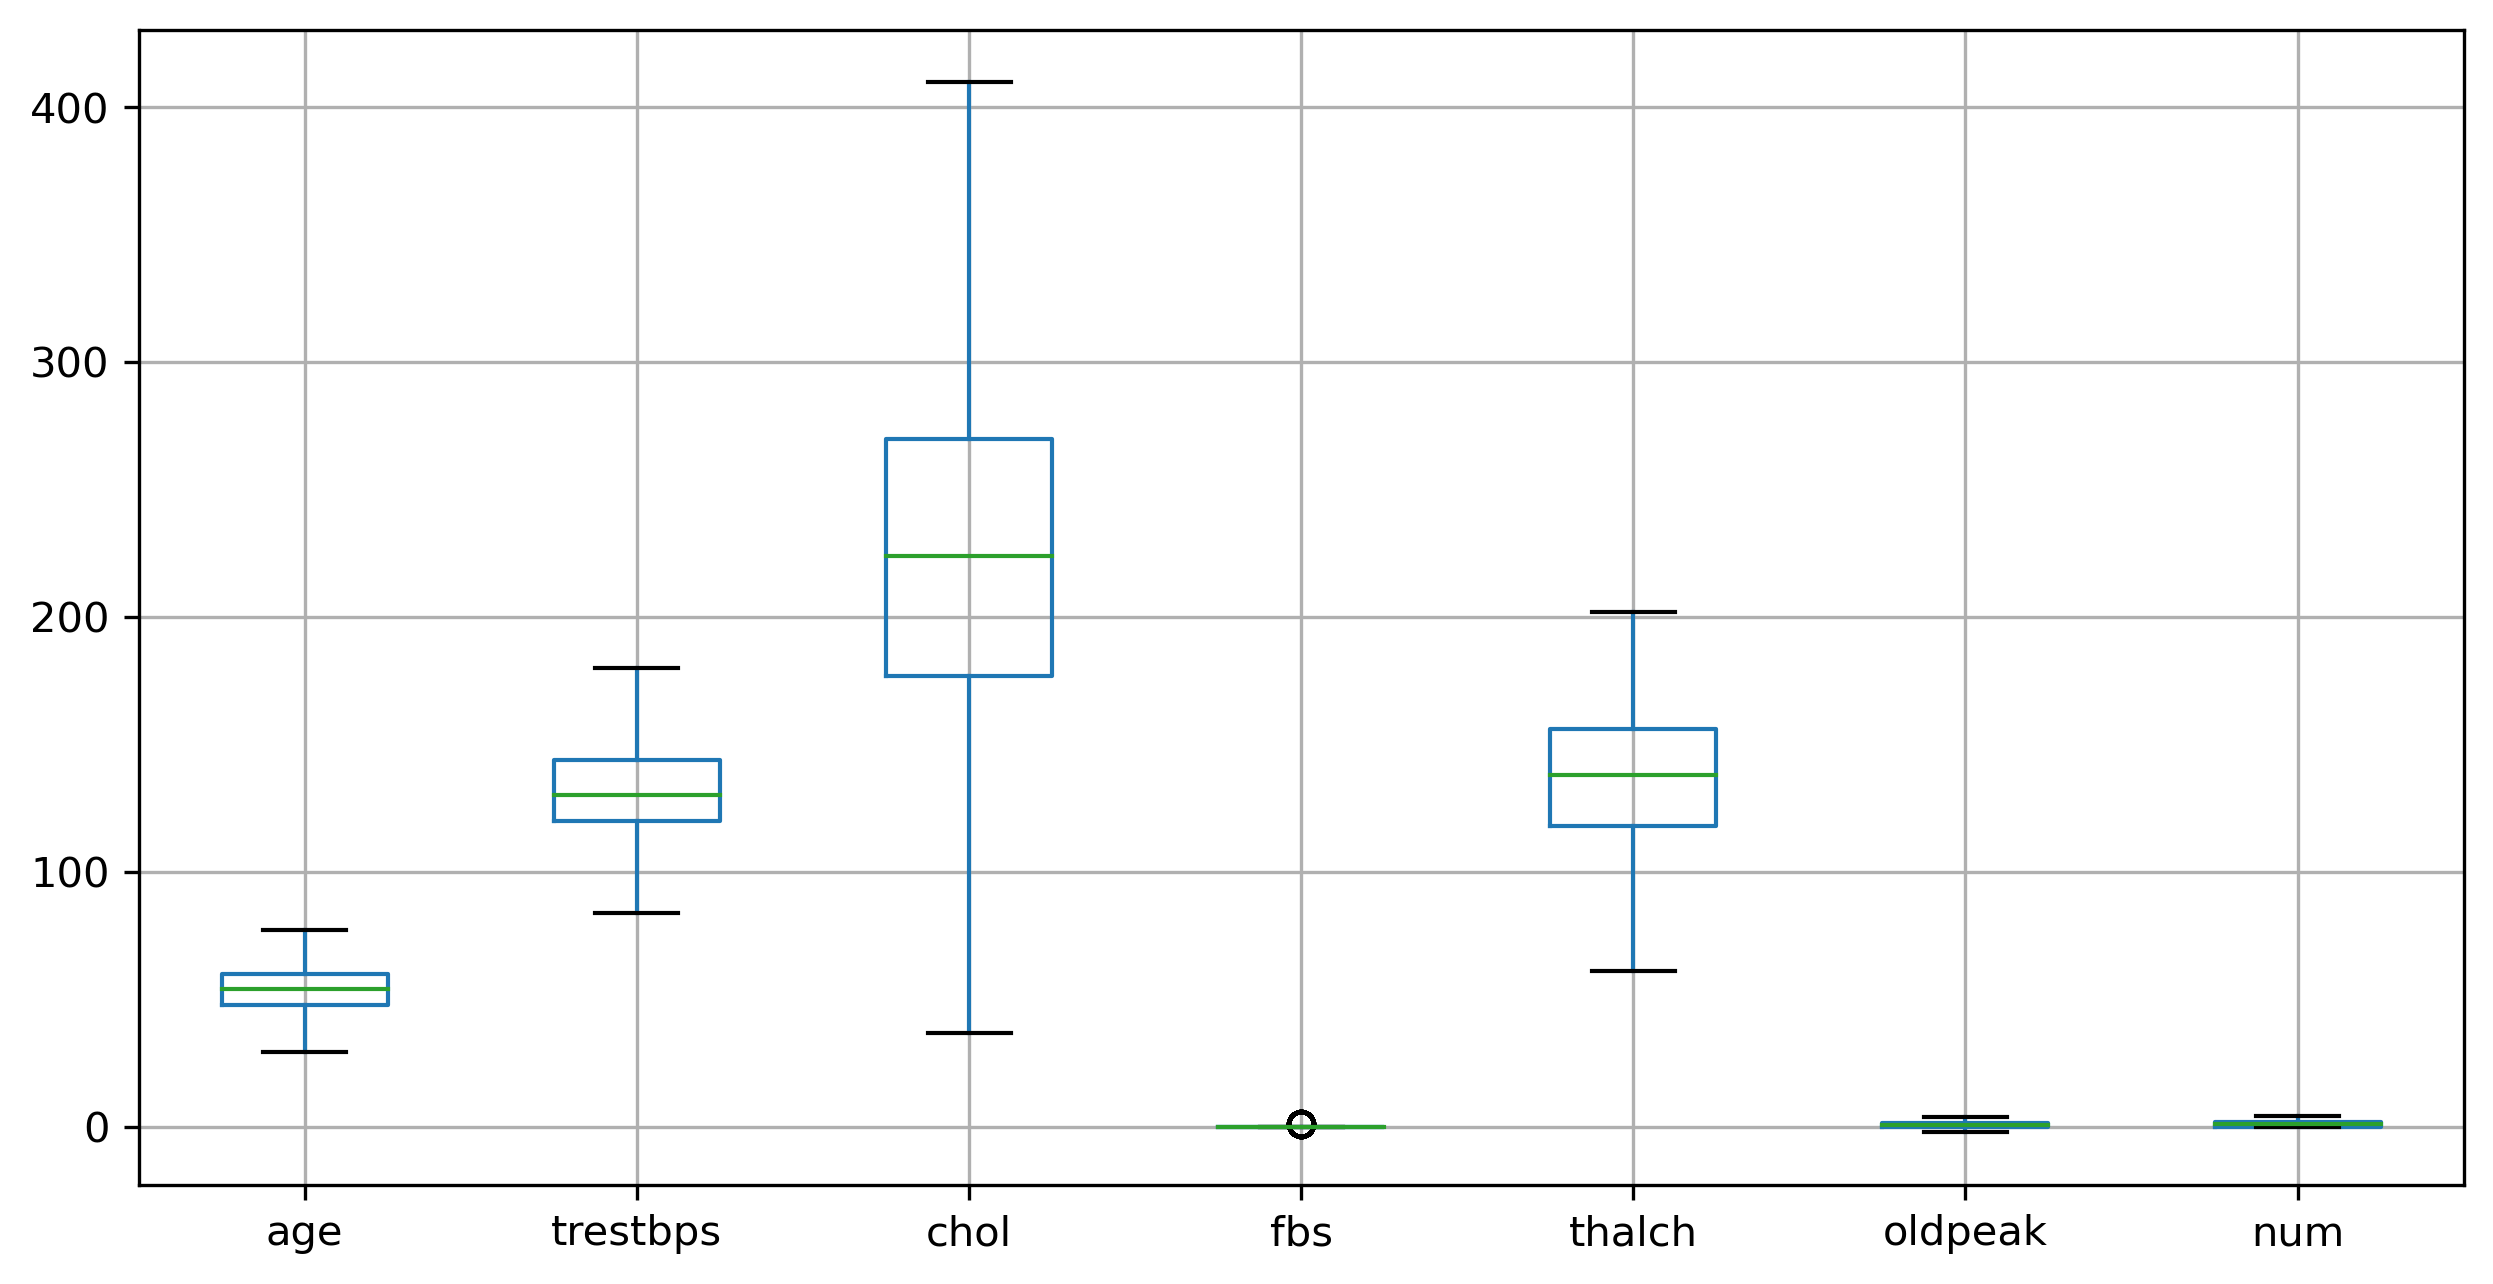

In [16]:
data.boxplot()

In [17]:
data.describe()

age    trestbps        chol      thalch     oldpeak         num
count  908.000000  908.000000  908.000000  908.000000  908.000000  908.000000
mean    53.792263  133.283040  207.357517  135.958150    0.854846    1.008811
std      9.156920   19.300452   96.873971   26.801825    1.024737    1.144436
min     29.375000   84.000000   36.875000   61.000000   -2.250000    0.000000
25%     47.750000  120.000000  176.750000  118.000000    0.000000    0.000000
50%     54.000000  130.000000  224.000000  138.000000    0.500000    1.000000
75%     60.000000  144.000000  270.000000  156.000000    1.500000    2.000000
max     77.000000  180.000000  409.875000  202.000000    3.750000    4.000000

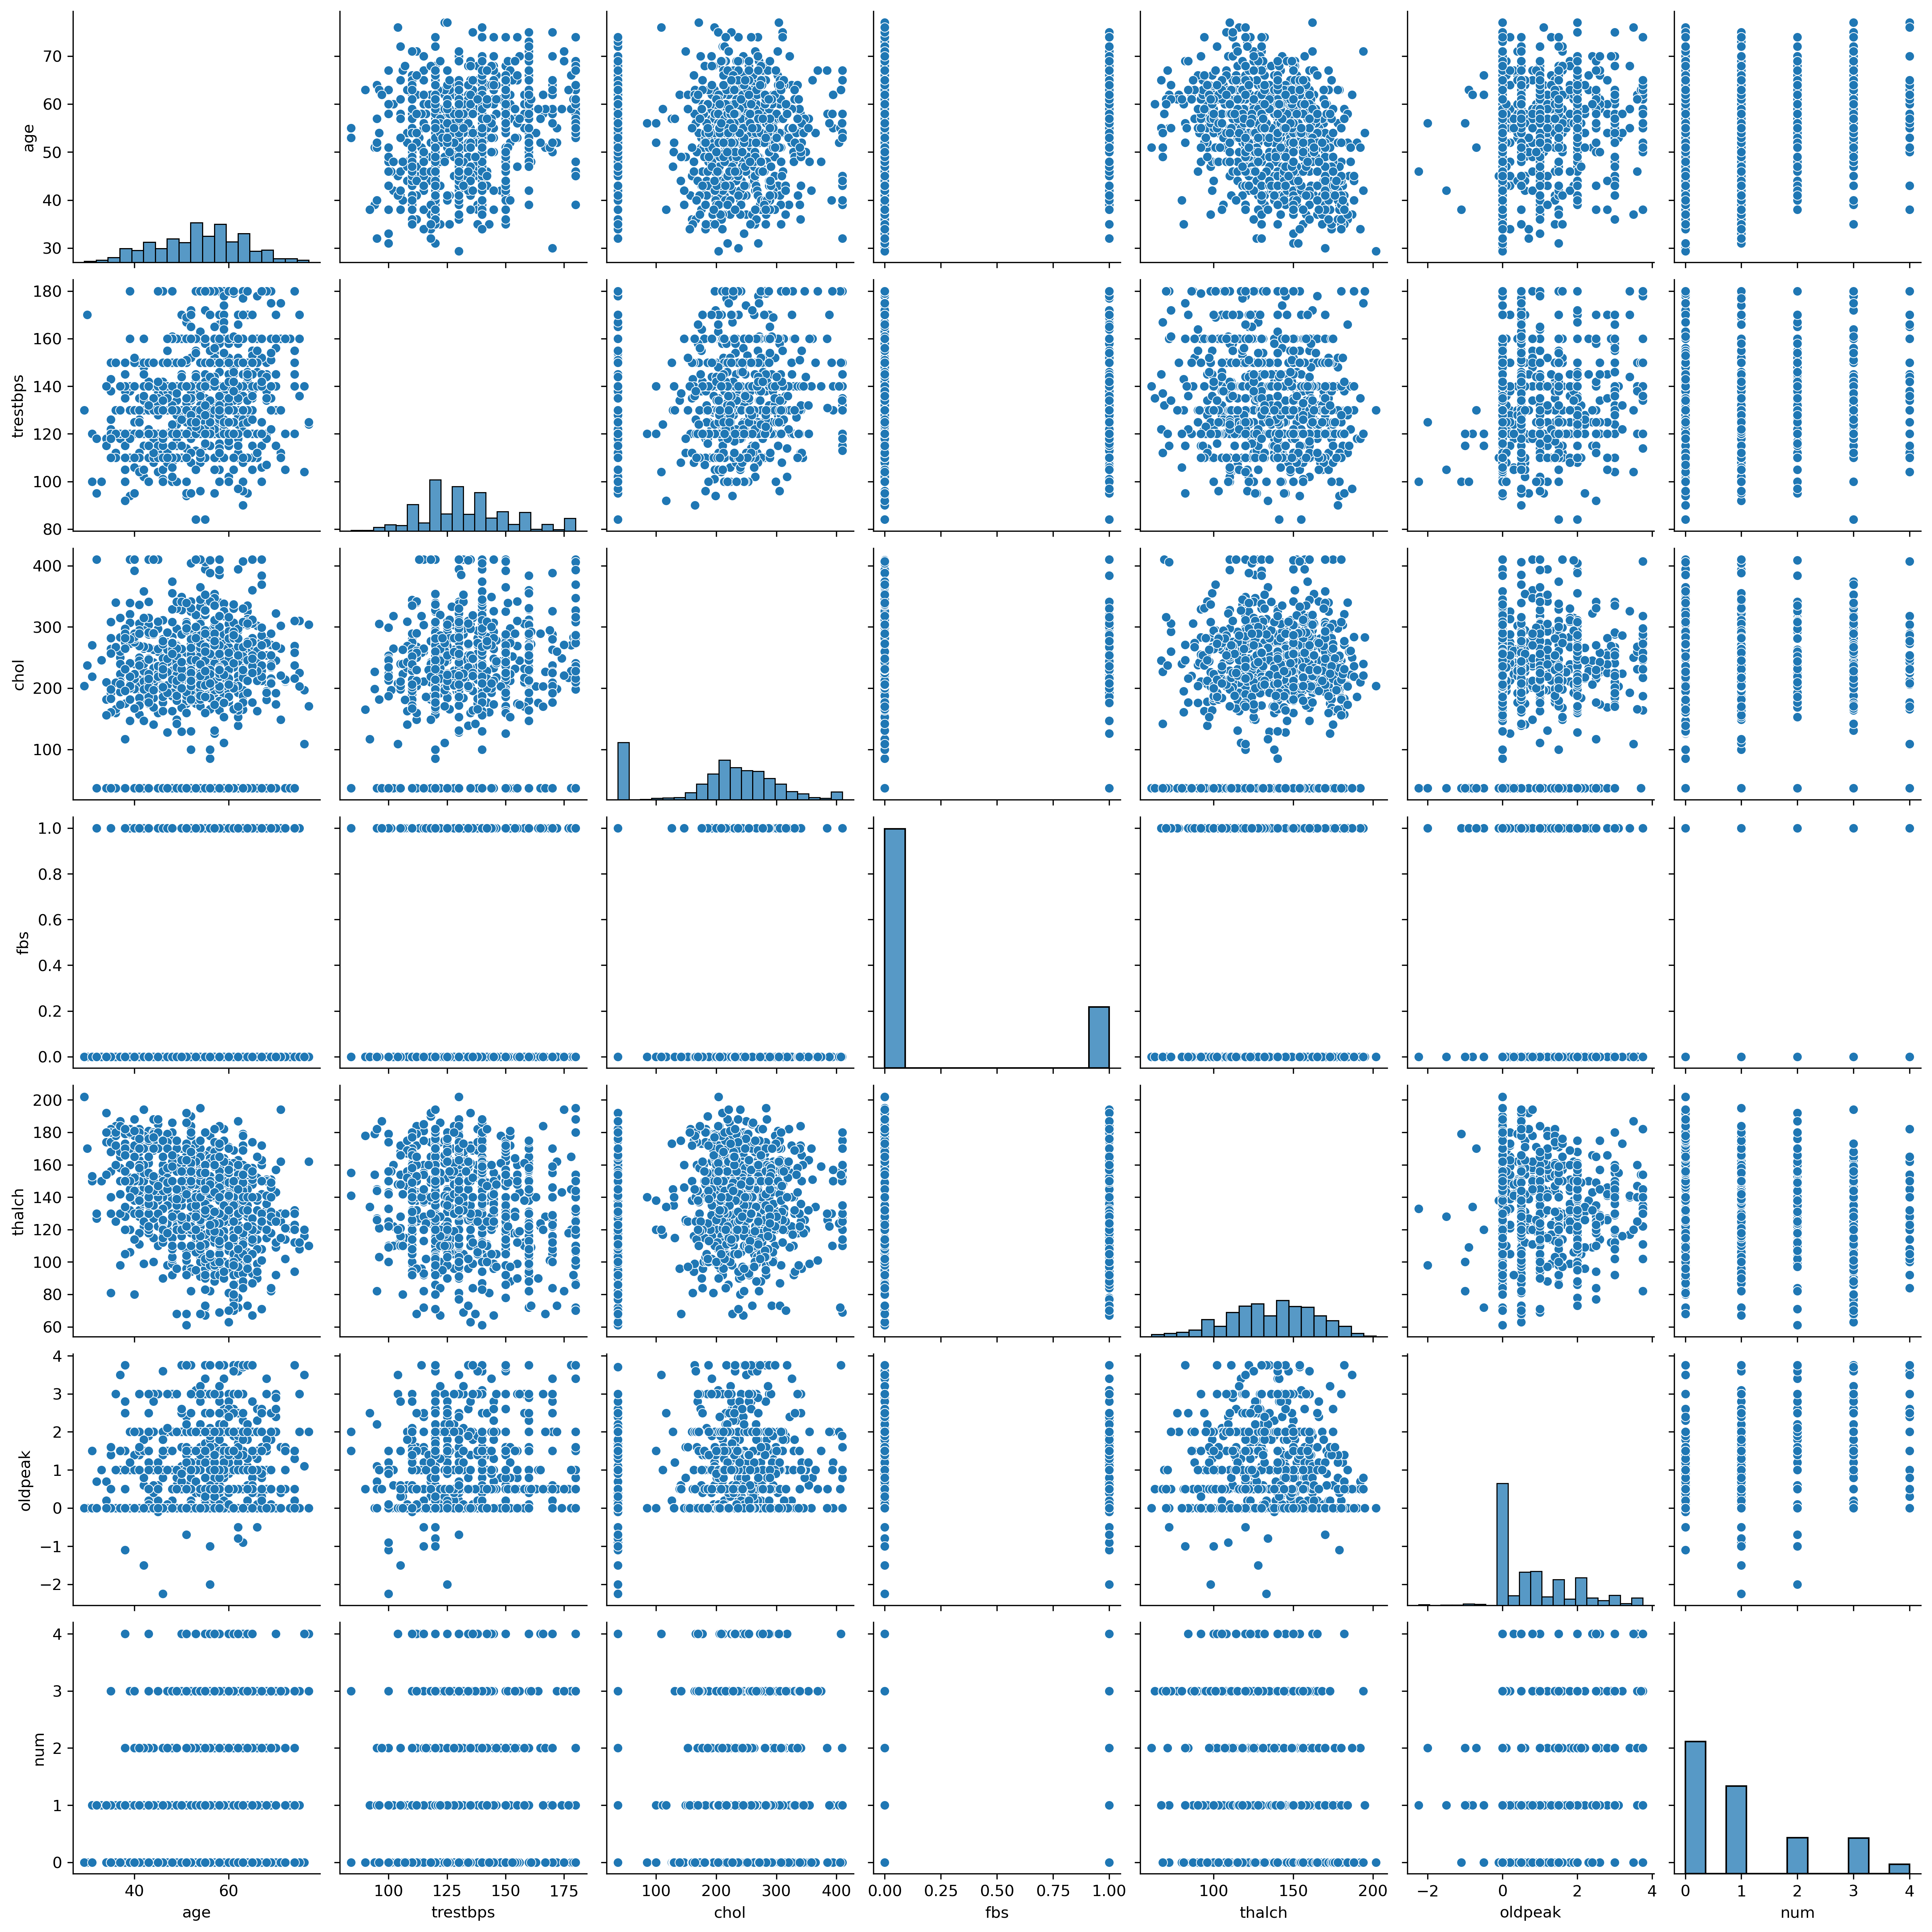

In [18]:
# all the outliers are removed 
sns.pairplot(data)

<Axes: >

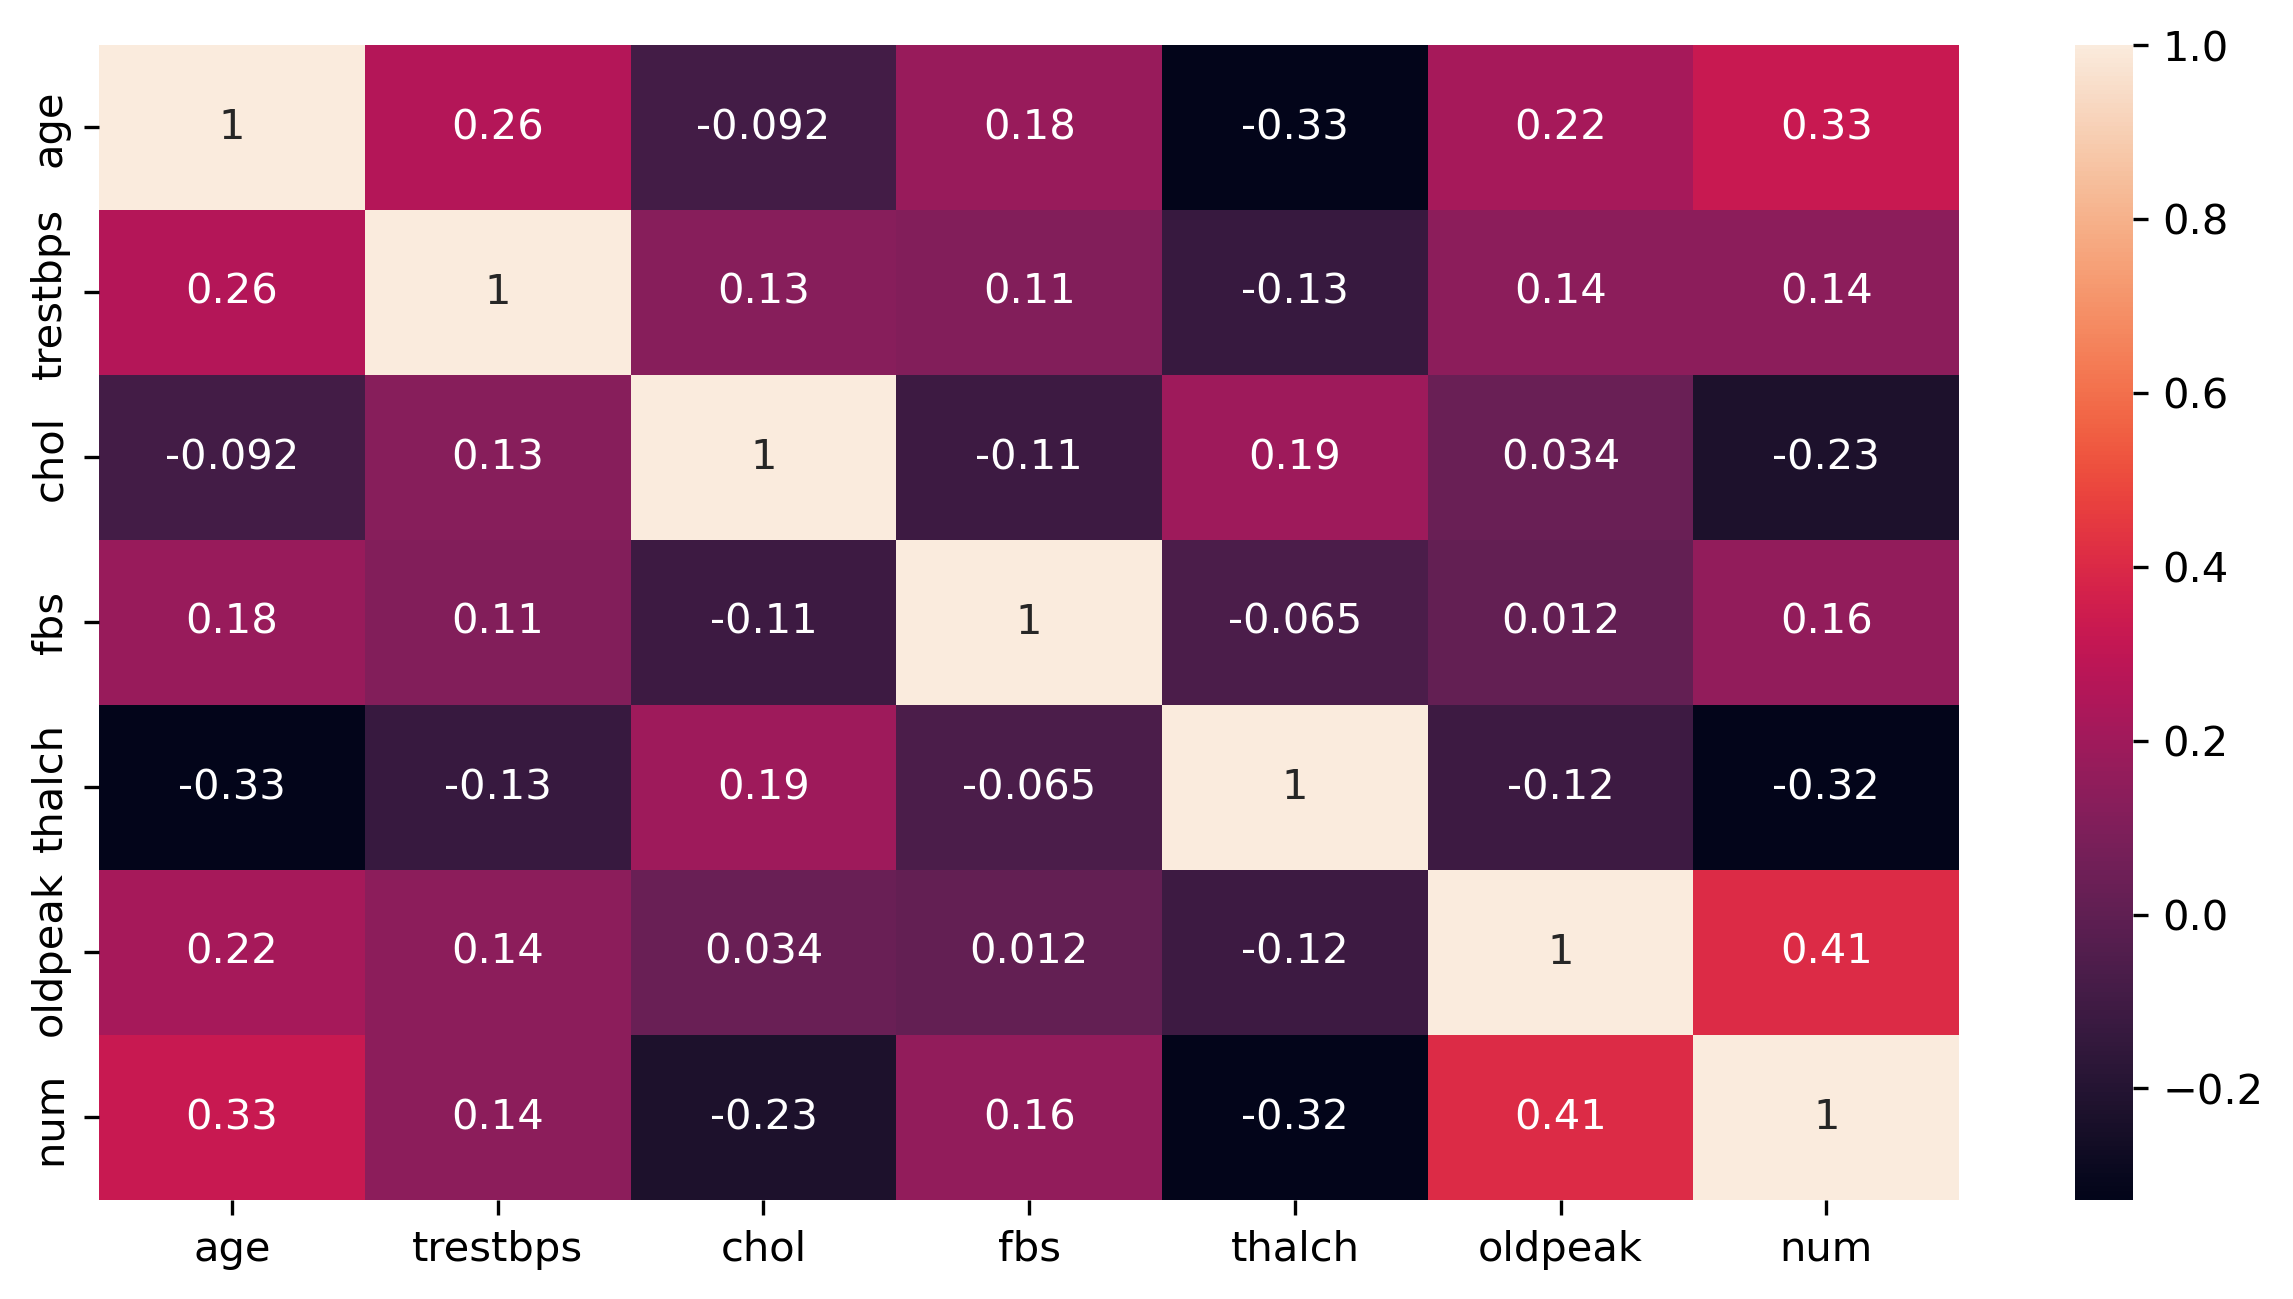

In [19]:
sns.heatmap(data.corr(),annot=True)

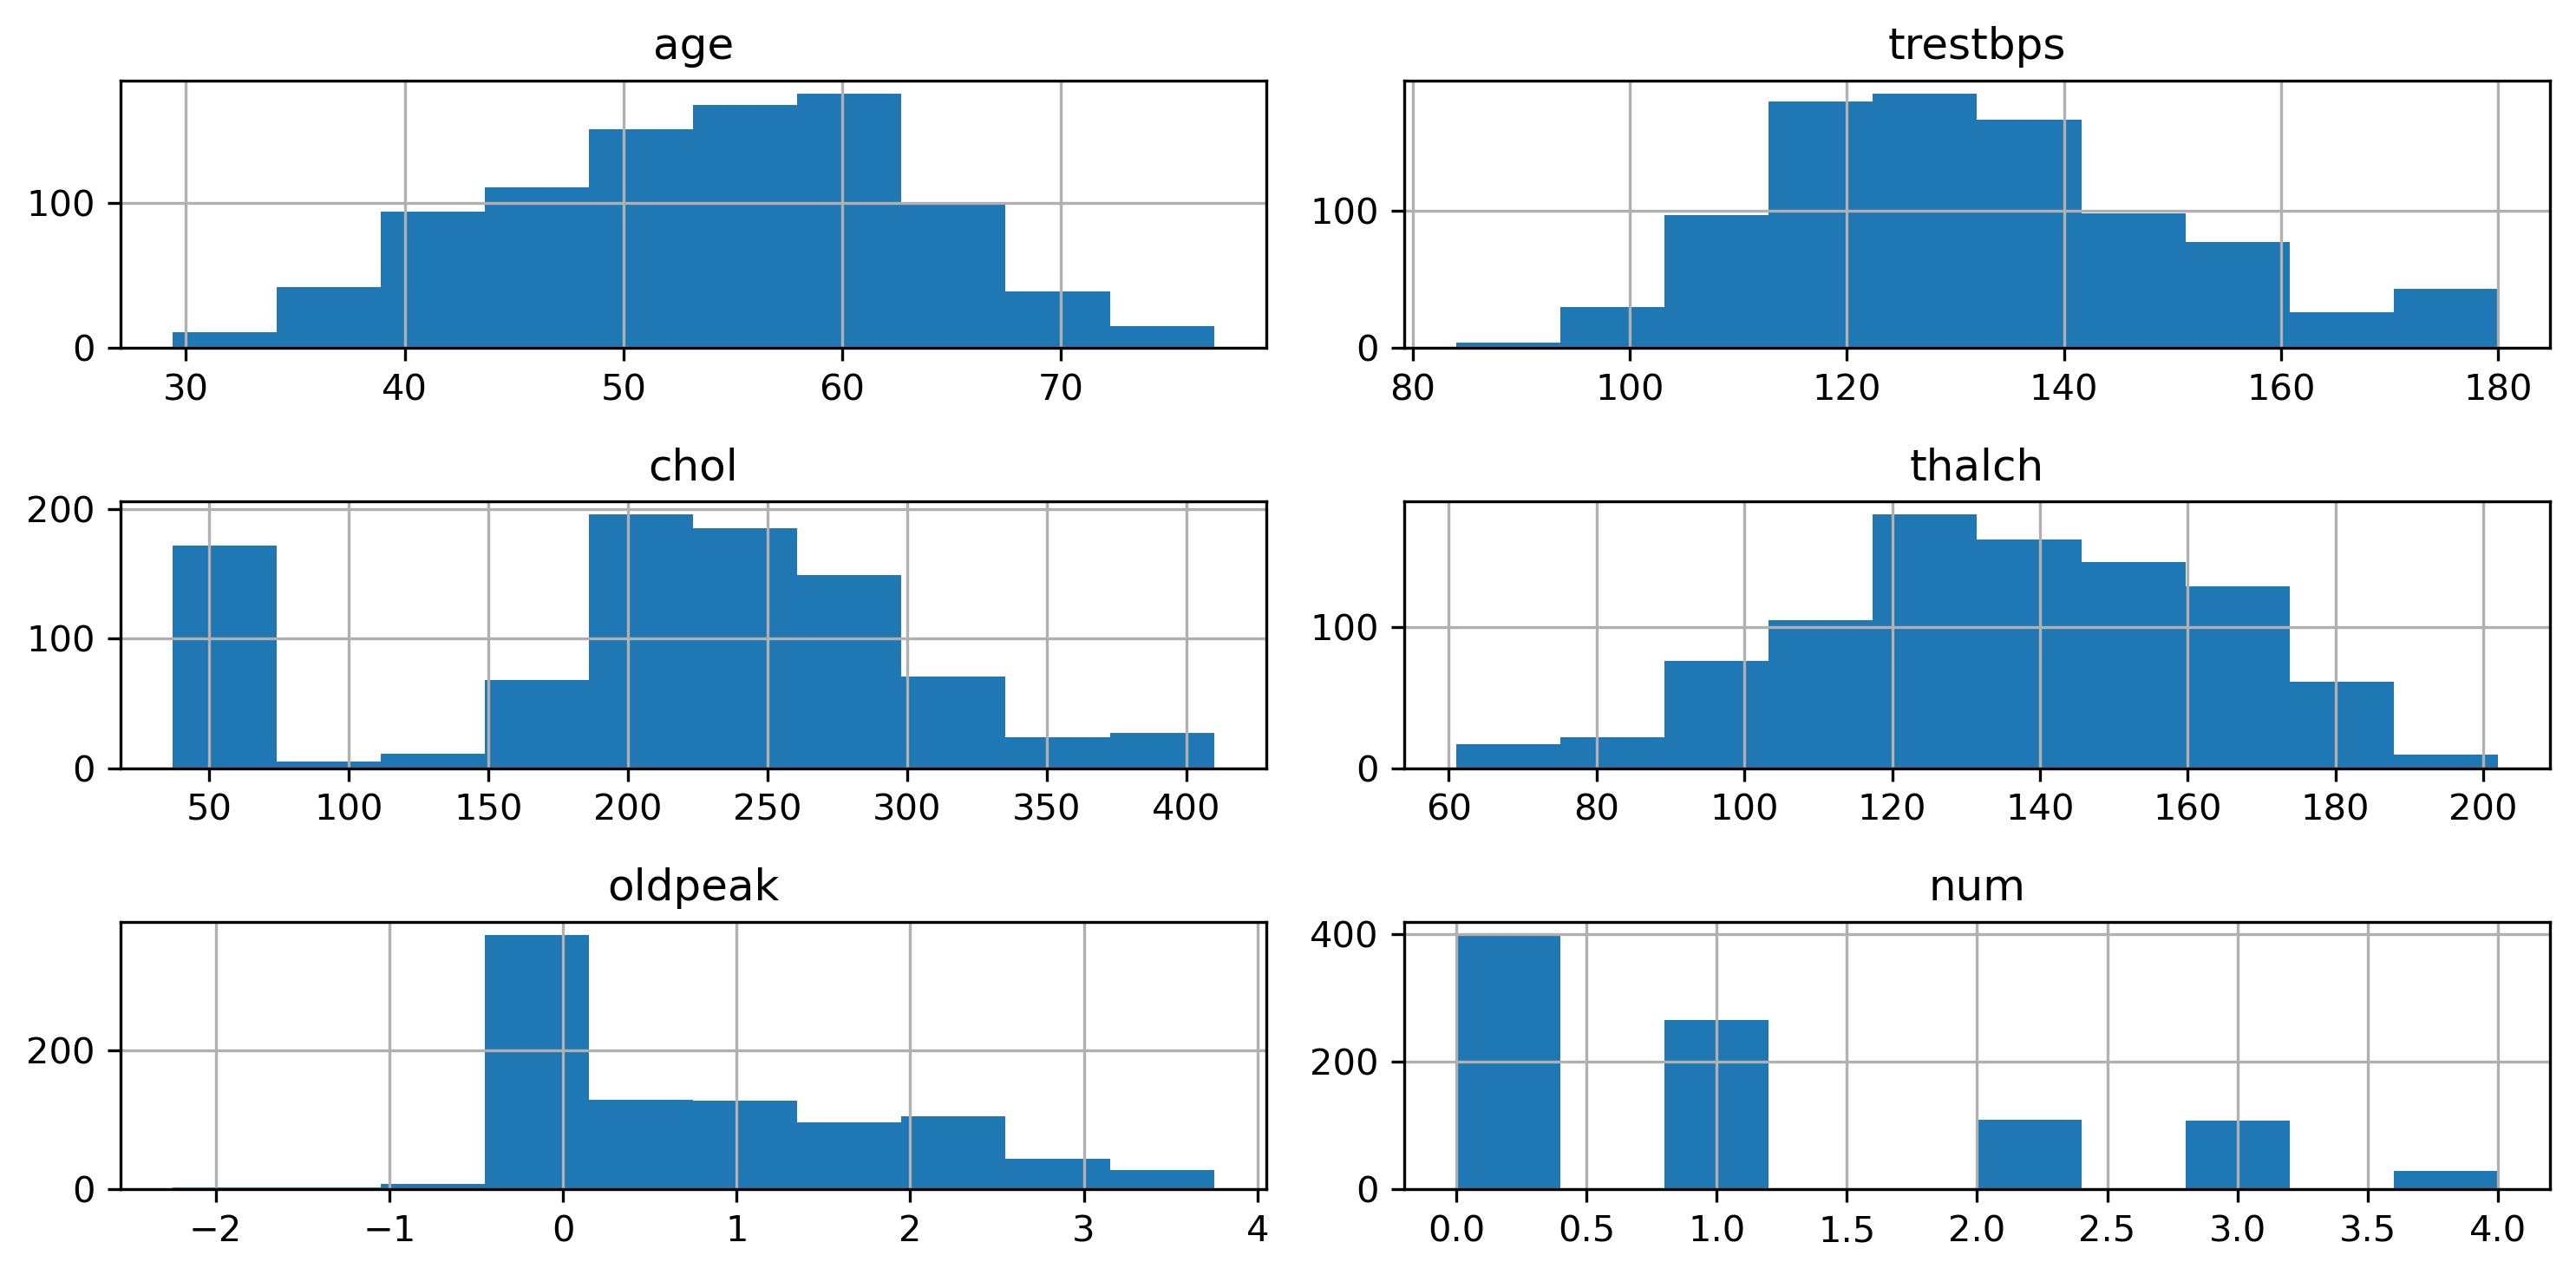

In [20]:
data.hist()
plt.tight_layout()

In [21]:
data['age'] = data['age'].astype(int)

In [22]:
data

age   sex               cp  trestbps     chol    fbs           restecg  \
0     63  Male   typical angina       145  233.000   True    lv hypertrophy   
1     41  Male  atypical angina       135  203.000  False            normal   
2     57  Male     asymptomatic       140  192.000  False            normal   
3     52  Male   typical angina       118  186.000  False    lv hypertrophy   
4     57  Male     asymptomatic       110  201.000  False            normal   
..   ...   ...              ...       ...      ...    ...               ...   
903   53  Male     asymptomatic       125   36.875  False            normal   
904   62  Male     asymptomatic       166  170.000  False  st-t abnormality   
905   56  Male      non-anginal       170   36.875  False    lv hypertrophy   
906   56  Male      non-anginal       144  208.000   True  st-t abnormality   
907   57  Male     asymptomatic       142  277.000   True  st-t abnormality   

     thalch  exang  oldpeak        slope               thal  num  
0       150  FALSE      2.3  downsloping       fixed defect    0  
1       132  FALSE      0.0         flat       fixed defect    0  
2       148  FALSE      0.4         flat       fixed defect    0  
3       190  FALSE      0.0         flat       fixed defect    0  
4       126   TRUE      1.5         flat       fixed defect    0  
..      ...    ...      ...          ...                ...  ...  
903     120  FALSE      1.5    upsloping       fixed defect    4  
904     120   TRUE      3.0         flat             normal    4  
905     123   TRUE      2.5  downsloping             normal    4  
906     105   TURE      0.5  downsloping  reversable defect    4  
907     182  FALSE      0.5         flat             normal    4  

[908 rows x 13 columns]

In [23]:
# we will perform labelEncoding and OneHotEncoding on the data 
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [24]:
# for the target column we will use LabelEncoder 
LE = LabelEncoder()
data['num'] = LE.fit_transform(data['num'])

In [25]:
data

age   sex               cp  trestbps     chol    fbs           restecg  \
0     63  Male   typical angina       145  233.000   True    lv hypertrophy   
1     41  Male  atypical angina       135  203.000  False            normal   
2     57  Male     asymptomatic       140  192.000  False            normal   
3     52  Male   typical angina       118  186.000  False    lv hypertrophy   
4     57  Male     asymptomatic       110  201.000  False            normal   
..   ...   ...              ...       ...      ...    ...               ...   
903   53  Male     asymptomatic       125   36.875  False            normal   
904   62  Male     asymptomatic       166  170.000  False  st-t abnormality   
905   56  Male      non-anginal       170   36.875  False    lv hypertrophy   
906   56  Male      non-anginal       144  208.000   True  st-t abnormality   
907   57  Male     asymptomatic       142  277.000   True  st-t abnormality   

     thalch  exang  oldpeak        slope               thal  num  
0       150  FALSE      2.3  downsloping       fixed defect    0  
1       132  FALSE      0.0         flat       fixed defect    0  
2       148  FALSE      0.4         flat       fixed defect    0  
3       190  FALSE      0.0         flat       fixed defect    0  
4       126   TRUE      1.5         flat       fixed defect    0  
..      ...    ...      ...          ...                ...  ...  
903     120  FALSE      1.5    upsloping       fixed defect    4  
904     120   TRUE      3.0         flat             normal    4  
905     123   TRUE      2.5  downsloping             normal    4  
906     105   TURE      0.5  downsloping  reversable defect    4  
907     182  FALSE      0.5         flat             normal    4  

[908 rows x 13 columns]

In [26]:
# for independent variables we will use OneHotEncoding 
categorical_columns = data.select_dtypes(include = ['object','category','bool'])

In [27]:
categorical_columns

sex               cp    fbs           restecg  exang        slope  \
0    Male   typical angina   True    lv hypertrophy  FALSE  downsloping   
1    Male  atypical angina  False            normal  FALSE         flat   
2    Male     asymptomatic  False            normal  FALSE         flat   
3    Male   typical angina  False    lv hypertrophy  FALSE         flat   
4    Male     asymptomatic  False            normal   TRUE         flat   
..    ...              ...    ...               ...    ...          ...   
903  Male     asymptomatic  False            normal  FALSE    upsloping   
904  Male     asymptomatic  False  st-t abnormality   TRUE         flat   
905  Male      non-anginal  False    lv hypertrophy   TRUE  downsloping   
906  Male      non-anginal   True  st-t abnormality   TURE  downsloping   
907  Male     asymptomatic   True  st-t abnormality  FALSE         flat   

                  thal  
0         fixed defect  
1         fixed defect  
2         fixed defect  
3         fixed defect  
4         fixed defect  
..                 ...  
903       fixed defect  
904             normal  
905             normal  
906  reversable defect  
907             normal  

[908 rows x 7 columns]

In [28]:
OHE = OneHotEncoder(sparse_output = False)
enc_columns = OHE.fit_transform(categorical_columns)

In [29]:
enc_data = pd.DataFrame(enc_columns, columns = OHE.get_feature_names_out(categorical_columns.columns))

In [30]:
data = pd.concat([data,enc_data],axis = 1)

In [31]:
data

age   sex               cp  trestbps     chol    fbs           restecg  \
0     63  Male   typical angina       145  233.000   True    lv hypertrophy   
1     41  Male  atypical angina       135  203.000  False            normal   
2     57  Male     asymptomatic       140  192.000  False            normal   
3     52  Male   typical angina       118  186.000  False    lv hypertrophy   
4     57  Male     asymptomatic       110  201.000  False            normal   
..   ...   ...              ...       ...      ...    ...               ...   
903   53  Male     asymptomatic       125   36.875  False            normal   
904   62  Male     asymptomatic       166  170.000  False  st-t abnormality   
905   56  Male      non-anginal       170   36.875  False    lv hypertrophy   
906   56  Male      non-anginal       144  208.000   True  st-t abnormality   
907   57  Male     asymptomatic       142  277.000   True  st-t abnormality   

     thalch  exang  oldpeak  ... restecg_st-t abnormality exang_FALSE  \
0       150  FALSE      2.3  ...                      0.0         1.0   
1       132  FALSE      0.0  ...                      0.0         1.0   
2       148  FALSE      0.4  ...                      0.0         1.0   
3       190  FALSE      0.0  ...                      0.0         1.0   
4       126   TRUE      1.5  ...                      0.0         0.0   
..      ...    ...      ...  ...                      ...         ...   
903     120  FALSE      1.5  ...                      0.0         1.0   
904     120   TRUE      3.0  ...                      1.0         0.0   
905     123   TRUE      2.5  ...                      0.0         0.0   
906     105   TURE      0.5  ...                      1.0         0.0   
907     182  FALSE      0.5  ...                      1.0         1.0   

     exang_TRUE  exang_TURE  slope_downsloping  slope_flat  slope_upsloping  \
0           0.0         0.0                1.0         0.0              0.0   
1           0.0         0.0                0.0         1.0              0.0   
2           0.0         0.0                0.0         1.0              0.0   
3           0.0         0.0                0.0         1.0              0.0   
4           1.0         0.0                0.0         1.0              0.0   
..          ...         ...                ...         ...              ...   
903         0.0         0.0                0.0         0.0              1.0   
904         1.0         0.0                0.0         1.0              0.0   
905         1.0         0.0                1.0         0.0              0.0   
906         0.0         1.0                1.0         0.0              0.0   
907         0.0         0.0                0.0         1.0              0.0   

     thal_fixed defect  thal_normal  thal_reversable defect  
0                  1.0          0.0                     0.0  
1                  1.0          0.0                     0.0  
2                  1.0          0.0                     0.0  
3                  1.0          0.0                     0.0  
4                  1.0          0.0                     0.0  
..                 ...          ...                     ...  
903                1.0          0.0                     0.0  
904                0.0          1.0                     0.0  
905                0.0          1.0                     0.0  
906                0.0          0.0                     1.0  
907                0.0          1.0                     0.0  

[908 rows x 33 columns]

In [32]:
data_encoded = data.select_dtypes(include = ['int','float'])

In [33]:
data_encoded

age  trestbps     chol  thalch  oldpeak  num  sex_Female  sex_Male  \
0     63       145  233.000     150      2.3    0         0.0       1.0   
1     41       135  203.000     132      0.0    0         0.0       1.0   
2     57       140  192.000     148      0.4    0         0.0       1.0   
3     52       118  186.000     190      0.0    0         0.0       1.0   
4     57       110  201.000     126      1.5    0         0.0       1.0   
..   ...       ...      ...     ...      ...  ...         ...       ...   
903   53       125   36.875     120      1.5    4         0.0       1.0   
904   62       166  170.000     120      3.0    4         0.0       1.0   
905   56       170   36.875     123      2.5    4         0.0       1.0   
906   56       144  208.000     105      0.5    4         0.0       1.0   
907   57       142  277.000     182      0.5    4         0.0       1.0   

     cp_asymptomatic  cp_atypical angina  ...  restecg_st-t abnormality  \
0                0.0                 0.0  ...                       0.0   
1                0.0                 1.0  ...                       0.0   
2                1.0                 0.0  ...                       0.0   
3                0.0                 0.0  ...                       0.0   
4                1.0                 0.0  ...                       0.0   
..               ...                 ...  ...                       ...   
903              1.0                 0.0  ...                       0.0   
904              1.0                 0.0  ...                       1.0   
905              0.0                 0.0  ...                       0.0   
906              0.0                 0.0  ...                       1.0   
907              1.0                 0.0  ...                       1.0   

     exang_FALSE  exang_TRUE  exang_TURE  slope_downsloping  slope_flat  \
0            1.0         0.0         0.0                1.0         0.0   
1            1.0         0.0         0.0                0.0         1.0   
2            1.0         0.0         0.0                0.0         1.0   
3            1.0         0.0         0.0                0.0         1.0   
4            0.0         1.0         0.0                0.0         1.0   
..           ...         ...         ...                ...         ...   
903          1.0         0.0         0.0                0.0         0.0   
904          0.0         1.0         0.0                0.0         1.0   
905          0.0         1.0         0.0                1.0         0.0   
906          0.0         0.0         1.0                1.0         0.0   
907          1.0         0.0         0.0                0.0         1.0   

     slope_upsloping  thal_fixed defect  thal_normal  thal_reversable defect  
0                0.0                1.0          0.0                     0.0  
1                0.0                1.0          0.0                     0.0  
2                0.0                1.0          0.0                     0.0  
3                0.0                1.0          0.0                     0.0  
4                0.0                1.0          0.0                     0.0  
..               ...                ...          ...                     ...  
903              1.0                1.0          0.0                     0.0  
904              0.0                0.0          1.0                     0.0  
905              0.0                0.0          1.0                     0.0  
906              0.0                0.0          0.0                     1.0  
907              0.0                0.0          1.0                     0.0  

[908 rows x 26 columns]

In [34]:
# we will train and test on data_encoded dataset 
X = data_encoded.drop('num',axis=1)
Y = data_encoded['num']

In [35]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

##### Building Decision Tree Classifier

In [40]:
model = DecisionTreeClassifier(random_state=42)
model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [41]:
y_pred = model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.65      0.80      0.72        76
           1       0.48      0.42      0.45        55
           2       0.25      0.18      0.21        22
           3       0.30      0.26      0.28        23
           4       0.00      0.00      0.00         6

    accuracy                           0.52       182
   macro avg       0.34      0.33      0.33       182
weighted avg       0.48      0.52      0.50       182



In [43]:
print(f'Accuracy : {accuracy_score(y_test,y_pred):.2f}')

Accuracy : 0.52


In [44]:
from sklearn.model_selection import GridSearchCV

In [48]:
# checking hyperparameter tuning
param_grid = {'max_depth':[3,5,10,20],
              'min_samples_split':[2,10,20],
              'criterion':['entropy','gini']}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [3, 5, 10, 20],
                         'min_samples_split': [2, 10, 20]},
             scoring='accuracy')

In [49]:
print("Best Parameter :",grid_search.best_params_)

Best Parameter : {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}


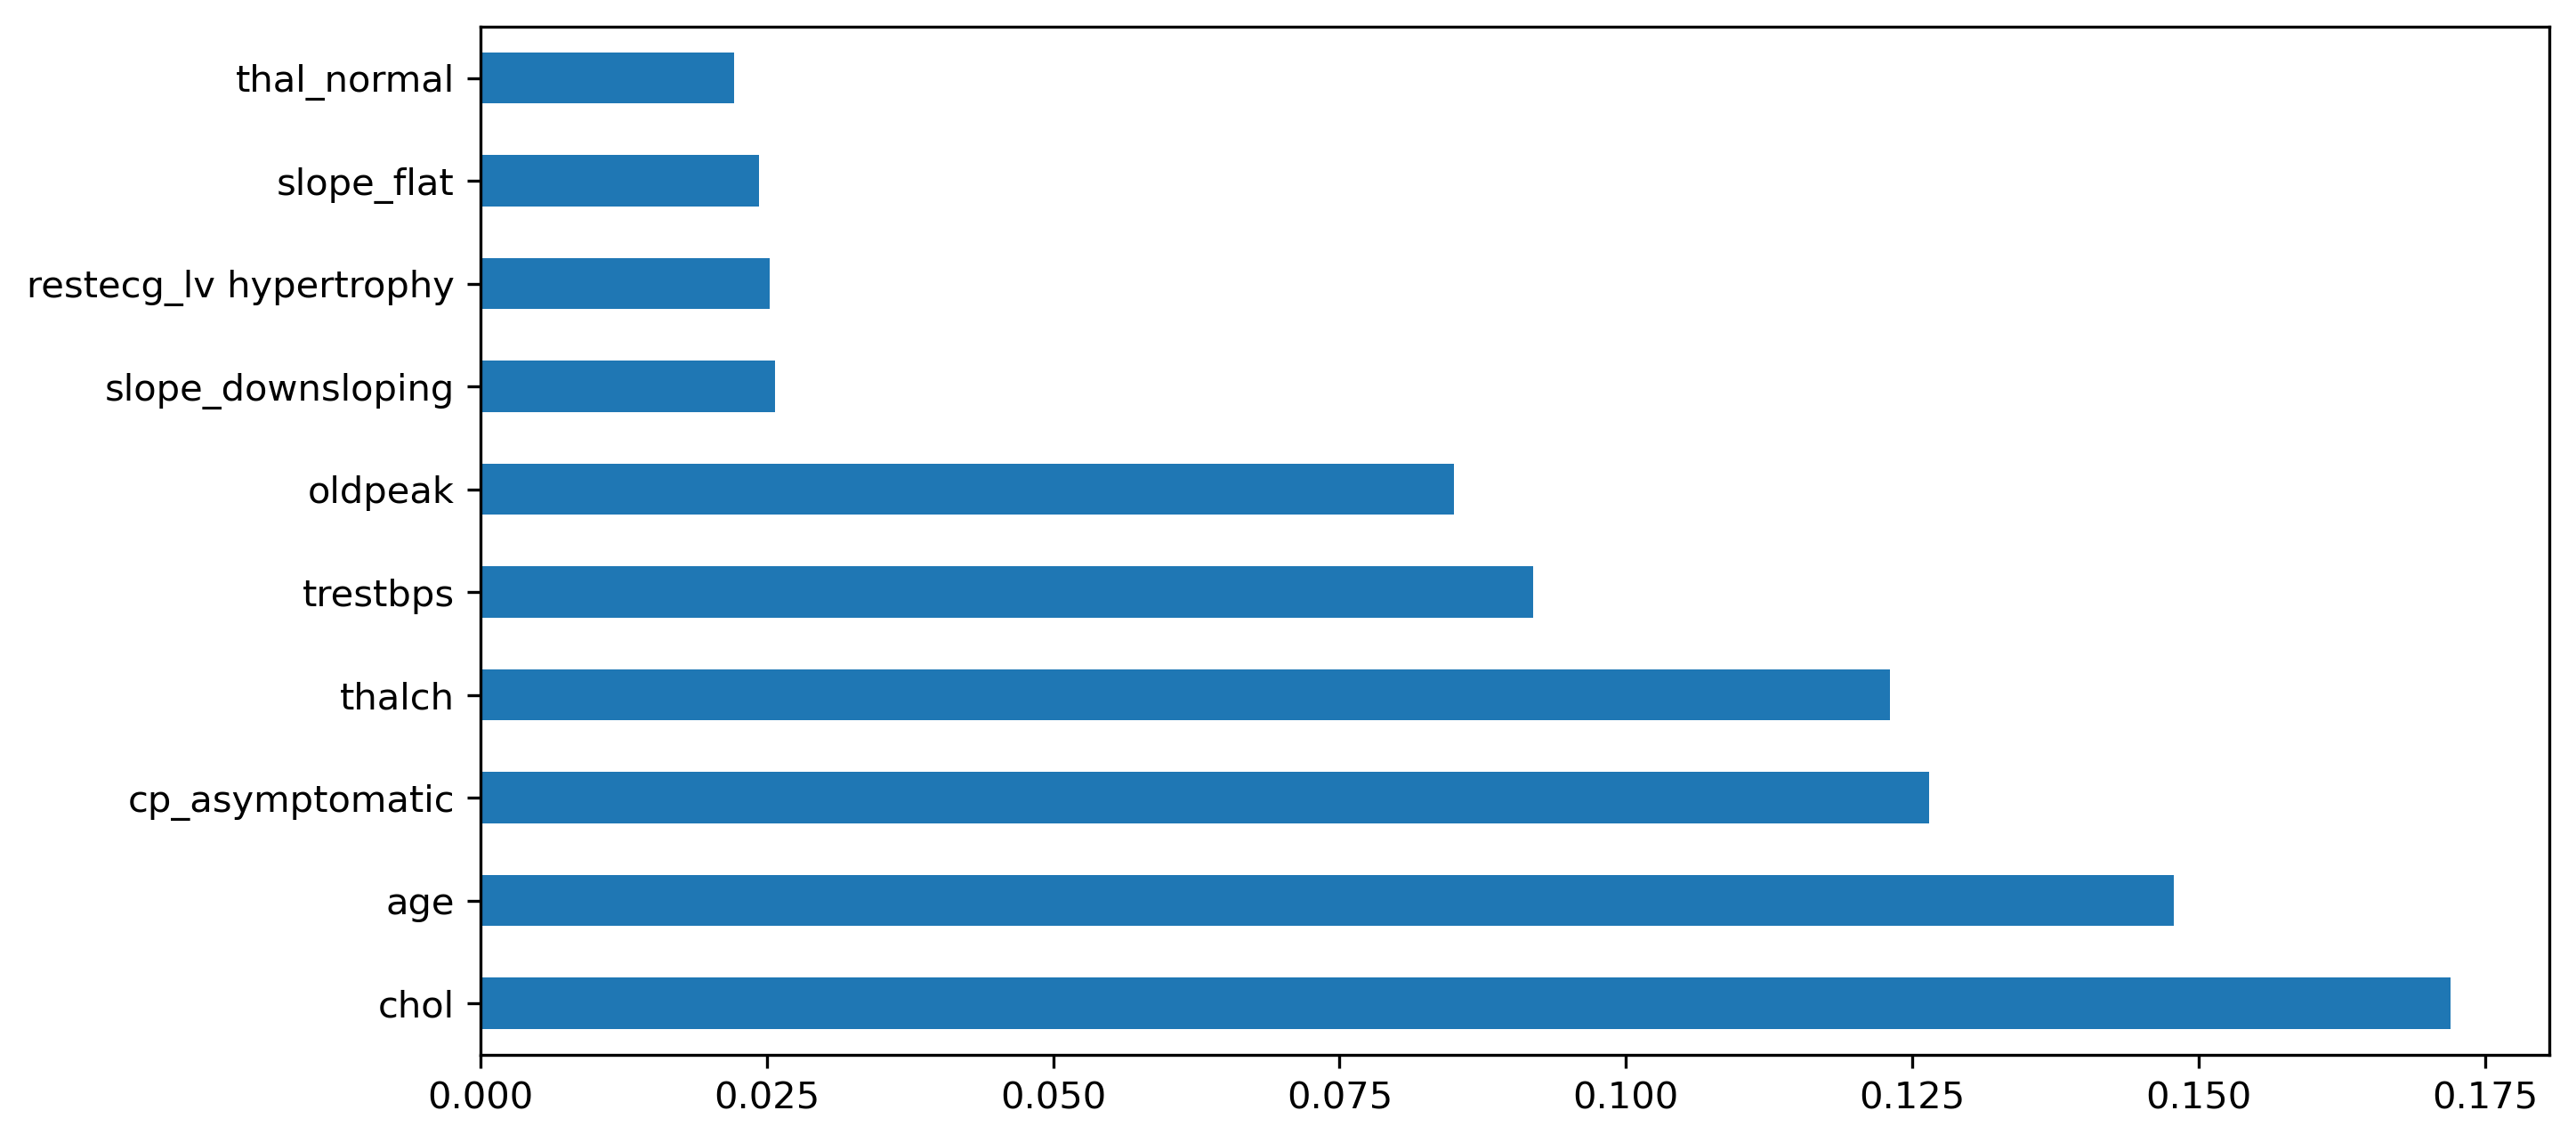

In [51]:
# checking which features are better for predicting
feature_importances = pd.Series(model.feature_importances_, index = x_train.columns)
feature_importances.nlargest(10).plot(kind = 'barh')
plt.show()

In [53]:
# using RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

In [54]:
rf_model = RandomForestClassifier(random_state=42)

In [55]:
rf_model.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [57]:
y_pred_rf = rf_model.predict(x_test)

In [75]:
print(classification_report(y_test,y_pred_rf))
np.mean(y_pred_rf==y_test)

              precision    recall  f1-score   support

           0       0.71      0.92      0.80        76
           1       0.48      0.49      0.49        55
           2       0.18      0.14      0.15        22
           3       0.40      0.17      0.24        23
           4       0.00      0.00      0.00         6

    accuracy                           0.57       182
   macro avg       0.35      0.34      0.34       182
weighted avg       0.51      0.57      0.53       182



0.5714285714285714

In [65]:
model = DecisionTreeClassifier(class_weight='balanced', random_state=42)
model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

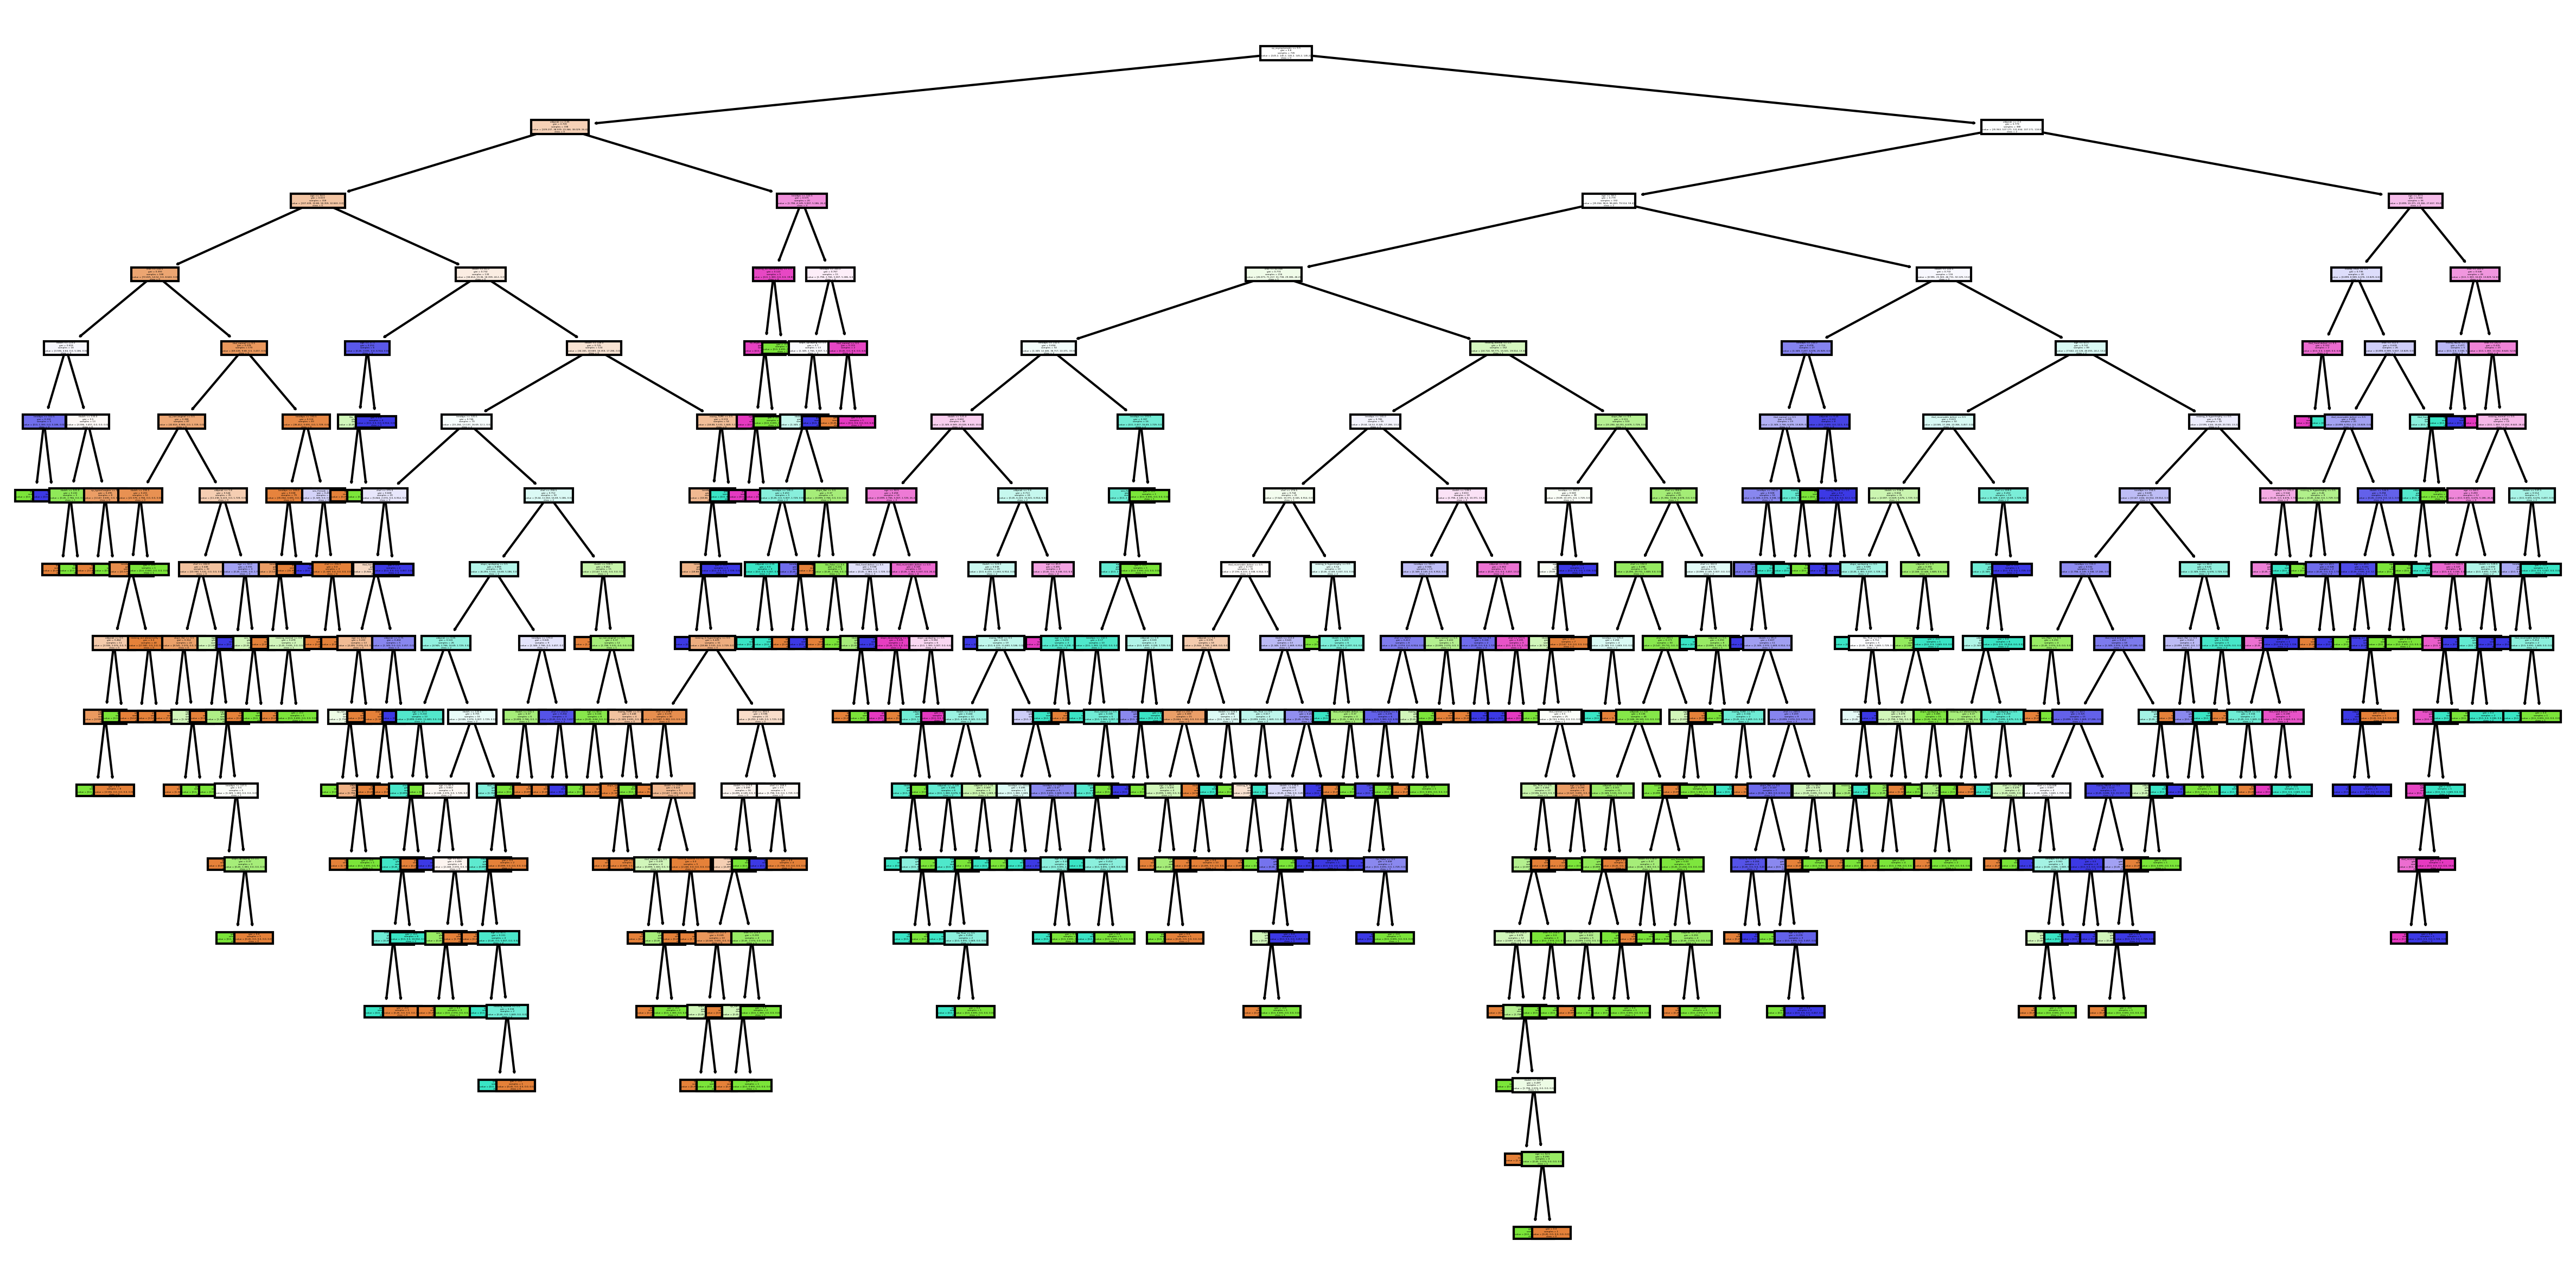

In [74]:
plt.figure(figsize=(20,10))
tree.plot_tree(model, filled=True, feature_names=x_train.columns, class_names=['0', '1', '2', '3', '4'])
plt.show()

In [69]:
model_gini = DecisionTreeClassifier(criterion = 'gini',max_depth=3, random_state=0)

In [70]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [73]:
pred=model_gini.predict(x_test)
np.mean(pred==y_test)

0.5

#### Interview Questions

In [1]:
'''
1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?
-> Common Hyperparameters of Decision Tree Models: Key hyperparameters include max_depth (limits the depth of the tree to 
   prevent overfitting), min_samples_split (minimum samples required to split an internal node), and min_samples_leaf 
   (minimum samples required at a leaf node). Adjusting these hyperparameters affects the model's complexity and 
   generalization, impacting both overfitting and underfitting.
'''

"\n1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?\n-> Common Hyperparameters of Decision Tree Models: Key hyperparameters include max_depth (limits the depth of the tree to \n   prevent overfitting), min_samples_split (minimum samples required to split an internal node), and min_samples_leaf \n   (minimum samples required at a leaf node). Adjusting these hyperparameters affects the model's complexity and \n   generalization, impacting both overfitting and underfitting.\n"

In [2]:
'''
2. What is the difference between the Label encoding and One-hot encoding?
-> Difference Between Label Encoding and One-Hot Encoding: Label encoding converts categorical labels into integer values, 
   making it suitable for ordinal data. One-hot encoding, on the other hand, creates binary columns for each category, 
   preventing the model from assuming a numerical relationship between categories, which is ideal for nominal data.
'''

'\n2. What is the difference between the Label encoding and One-hot encoding?\n-> Difference Between Label Encoding and One-Hot Encoding: Label encoding converts categorical labels into integer values, \n   making it suitable for ordinal data. One-hot encoding, on the other hand, creates binary columns for each category, \n   preventing the model from assuming a numerical relationship between categories, which is ideal for nominal data.\n'